In [ ]:
# 1) recognize and download the required dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

--2022-12-25 12:58:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  37.1MB/s    in 3.9s    

2022-12-25 12:58:49 (32.5 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
# 2) other relvant functions needed for data exploration
!wget https://raw.githubusercontent.com/Thlurte/Components/main/preprocessor.py

--2022-12-25 12:58:49--  https://raw.githubusercontent.com/Thlurte/Components/main/preprocessor.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2128 (2.1K) [text/plain]
Saving to: ‘preprocessor.py’

preprocessor.py     100%[===================>]   2.08K  --.-KB/s    in 0s      

2022-12-25 12:58:49 (8.56 MB/s) - ‘preprocessor.py’ saved [2128/2128]



In [ ]:
import os
import random

In [ ]:
# 3) libraries needed
import numpy
import seaborn
import pandas
import tensorflow
import matplotlib.pyplot
import matplotlib.image

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
# 4) custom functions
import preprocessor

In [ ]:
#  Parameters
IMG_SIZE = (224,224)
INPUT_SHAPE = (224,224,3)
BATCH_SIZE = 32

In [ ]:
# unzip the file
preprocessor.unzip_rawdata('/content/10_food_classes_1_percent.zip')

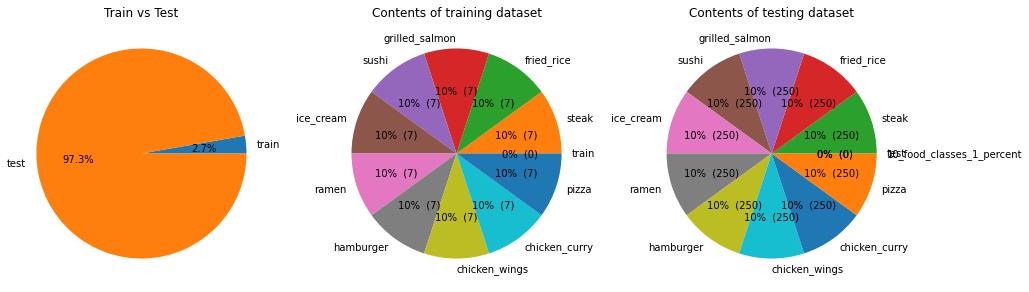

In [ ]:
# visualize the contents of the dataset
preprocessor.dir_explorer('/content/10_food_classes_1_percent')

In [ ]:
# after doing unwanted things for no reason, let's get to the problem
# define the directories
test_dir = '/content/10_food_classes_1_percent/test'
train_dir = '/content/10_food_classes_1_percent/train'

In [ ]:
# preprocess the images using the function `image_dataset_from_directory`
train_data = image_dataset_from_directory(train_dir,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)
test_data = image_dataset_from_directory(test_dir,label_mode='categorical',image_size=IMG_SIZE,batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
# define data augmentation layer
data_augme = tensorflow.keras.Sequential(name='data_augmentation')

data_augme.add(preprocessing.RandomFlip('horizontal'))
data_augme.add(preprocessing.RandomRotation(0.2))
data_augme.add(preprocessing.RandomZoom(0.2))
data_augme.add(preprocessing.RandomHeight(0.2))
data_augme.add(preprocessing.RandomWidth(0.2))

In [ ]:
# let's demonstrate how `data_augme` works
# define a function that randomly selects an image from the training dataset and display it using matplotlib
def dir_to_img(train_dir):
  random_class = random.choice(os.listdir(train_dir))
  random_image = random.choice(os.listdir(train_dir+'/'+random_class))
  random_image_path = train_dir+'/'+random_class+'/'+random_image
  random_image = matplotlib.image.imread(random_image_path)
  matplotlib.pyplot.imshow(random_image)
  matplotlib.pyplot.title(f'Original Image from class :- {random_class}')
  matplotlib.pyplot.axis(False)
  matplotlib.pyplot.show()
# now augment the image and display it again
def aug_img(train_dir):
  #
  random_class = random.choice(os.listdir(train_dir))
  random_image = random.choice(os.listdir(train_dir+'/'+random_class))
  random_image_path = train_dir+'/'+random_class+'/'+random_image
  random_image = matplotlib.image.imread(random_image_path)
  #
  matplotlib.pyplot.figure(figsize=(9,9))
  matplotlib.pyplot.subplot(1,2,1)
  matplotlib.pyplot.imshow(random_image)
  matplotlib.pyplot.title(f'Original Image from class :- {random_class}')
  matplotlib.pyplot.axis(False)
  matplotlib.pyplot.subplot(1,2,2)
  #
  random_image = data_augme(random_image)
  matplotlib.pyplot.imshow(random_image/255.)
  matplotlib.pyplot.title(f'Augmented Image from class :- {random_class}')
  matplotlib.pyplot.axis(False)
  matplotlib.pyplot.show()

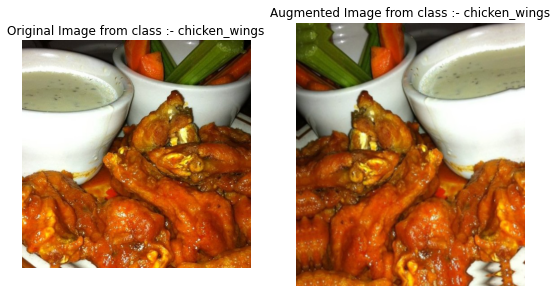

In [ ]:
aug_img(train_dir)

In [ ]:
# time to define base model
base_model = tensorflow.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False
inputs = tensorflow.keras.layers.Input(shape=INPUT_SHAPE,name='Input_Layer')

x = data_augme(inputs,training=True)

x = base_model(x,training=False)

x = tensorflow.keras.layers.GlobalAveragePooling2D()(x)

output = tensorflow.keras.layers.Dense(10,activation='softmax',name='Output_Layer')(x)

model_0 = tensorflow.keras.Model(inputs,output)

model_0.compile(
    loss=tensorflow.keras.losses.CategoricalCrossentropy()
    ,optimizer=tensorflow.keras.optimizers.Adam()
    ,metrics=['accuracy']
)

histroy_0 = model_0.fit(train_data,epochs=10
                        ,steps_per_epoch=len(train_data)
                        ,validation_data=test_data
                        ,validation_steps=len(test_data)
                        ,callbacks=[preprocessor.tensorboard_callback('Transfer_Learning','Model_0')]
)

Saving TensorBoard log files to: Transfer_Learning/Model_0/20221225-130230
Epoch 1/10
3/3 [==============================] - 187s 73s/step - loss: 2.3831 - accuracy: 0.1000 - val_loss: 2.1918 - val_accuracy: 0.2260
Epoch 2/10
3/3 [==============================] - 146s 72s/step - loss: 2.1454 - accuracy: 0.2286 - val_loss: 2.0807 - val_accuracy: 0.3132
Epoch 3/10
3/3 [==============================] - 145s 72s/step - loss: 1.9215 - accuracy: 0.4000 - val_loss: 1.9924 - val_accuracy: 0.3556
Epoch 4/10
3/3 [==============================] - 145s 72s/step - loss: 1.7287 - accuracy: 0.6143 - val_loss: 1.8972 - val_accuracy: 0.4188
Epoch 5/10
3/3 [==============================] - 145s 72s/step - loss: 1.6099 - accuracy: 0.6000 - val_loss: 1.8087 - val_accuracy: 0.4660
Epoch 6/10
3/3 [==============================] - 144s 71s/step - loss: 1.4476 - accuracy: 0.7857 - val_loss: 1.7360 - val_accuracy: 0.5008
Epoch 7/10
3/3 [==============================] - 145s 72s/step - loss: 1.2843 - accu

In [ ]:
def loss_curve(history):
    import matplotlib.pyplot
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    #
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    #
    epochs = range(len(history.history['loss']))
    
    # Plot loss curve
    matplotlib.pyplot.plot(epochs, loss, label='training_loss')
    matplotlib.pyplot.plot(epochs, val_loss, label='val_loss')
    matplotlib.pyplot.title('Loss')
    matplotlib.pyplot.xlabel('Epochs')
    matplotlib.pyplot.legend()

    # Plot accuracy
    matplotlib.pyplot.figure()
    matplotlib.pyplot.plot(epochs, accuracy, label='training_accuracy')
    matplotlib.pyplot.plot(epochs, val_accuracy, label='val_accuracy')
    matplotlib.pyplot.title('Accuracy')
    matplotlib.pyplot.xlabel('Epochs')
    matplotlib.pyplot.legend();

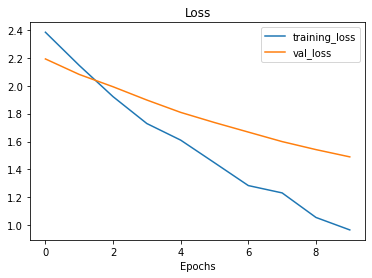

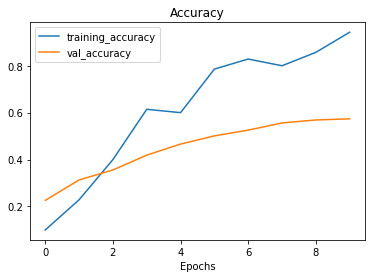

In [ ]:
loss_curve(histroy_0)